# Lecture 2 Notebook

1. Importing modules and other .py files
        a. Import common libraries
        b. Import other files
2. Magic Commands
        a. cd, pwd, ls
        b. run, load, writefile
        c. others if you want
3. Plotting
4. Local vs. Global variables

## Import

In [1]:
import numpy as np
import matplotlib.pyplot as plt

This imports everything in the numpy and matplotlib.pyplot files. But what if I don't want everything, I only want one specific function

In [2]:
from numpy import sin

In [3]:
sin(3.1415)

9.265358966049026e-05

Now python knows what sin is from the numpy module but nothing else, if I try to use cos

In [4]:
cos(3.1415)

NameError: name 'cos' is not defined

In [5]:
from numpy import * #This will give me everything from numpy and I don't have to do np.stuff
cos(pi)

-1.0

This is almost always a bad idea. The reason is that you don't know all of the functions that numpy as in it, there's a lot,

In [6]:
dir(np)

['ALLOW_THREADS',
 'AxisError',
 'BUFSIZE',
 'CLIP',
 'ComplexWarning',
 'DataSource',
 'ERR_CALL',
 'ERR_DEFAULT',
 'ERR_IGNORE',
 'ERR_LOG',
 'ERR_PRINT',
 'ERR_RAISE',
 'ERR_WARN',
 'FLOATING_POINT_SUPPORT',
 'FPE_DIVIDEBYZERO',
 'FPE_INVALID',
 'FPE_OVERFLOW',
 'FPE_UNDERFLOW',
 'False_',
 'Inf',
 'Infinity',
 'MAXDIMS',
 'MAY_SHARE_BOUNDS',
 'MAY_SHARE_EXACT',
 'MachAr',
 'ModuleDeprecationWarning',
 'NAN',
 'NINF',
 'NZERO',
 'NaN',
 'PINF',
 'PZERO',
 'PackageLoader',
 'RAISE',
 'RankWarning',
 'SHIFT_DIVIDEBYZERO',
 'SHIFT_INVALID',
 'SHIFT_OVERFLOW',
 'SHIFT_UNDERFLOW',
 'ScalarType',
 'Tester',
 'TooHardError',
 'True_',
 'UFUNC_BUFSIZE_DEFAULT',
 'UFUNC_PYVALS_NAME',
 'VisibleDeprecationWarning',
 'WRAP',
 '_NoValue',
 '__NUMPY_SETUP__',
 '__all__',
 '__builtins__',
 '__cached__',
 '__config__',
 '__doc__',
 '__file__',
 '__git_revision__',
 '__loader__',
 '__mkl_version__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_distributor_init',
 '_globa

If you use import * and you name your own function any of those names, you'll run into problems. So it's always safe to keep the np.function

## Other Programs
What if I want to use some probram someone else already made? Something like mars_angle from the book? How do I get it to run in my Jupyter Notebook? 

Dumb way: Copy and Paste

In [7]:
import numpy as np

def mars_angle(d):
    """
    Find the angle, in degrees, that mars appears in the sky on some day 'd' of
    the year 2000

    Input
    ----------
    d: This is the day that I want to evaluate things at

    Output
    ----------
    theta: Angle between Earth and Mars for the given input day 'd'
    """

    Pe = 365.256    #Period of the Earths orbit (days)
    Pm = 686.980    #Period of Mars orbit (days)
    d0 = 187        #Day in the year 2000 that mars crosses theta = 0
    Re = 1.496e8    #Radius of Earths Orbit (km)
    Rm = 2.279e8    #Radius of Mars orbit (km)

    phi_e = 2*np.pi*d/Pe
    phi_m = 2*np.pi*(d-d0)/Pm

    #Find the x and y positions for Earth and Mars
    xe = Re*np.cos( phi_e )
    ye = Re*np.sin( phi_e )
    xm = Rm*np.cos( phi_m )
    ym = Rm*np.sin( phi_m )

    if (xm-xe) > 0:
        theta = np.arctan((ym - ye) / (xm - xe))
    else:
        theta = np.arctan((ym - ye) / (xm - xe)) + np.pi
    theta = 180*theta / np.pi

    return theta

In [9]:
np.arctan(.5/-.5)

-0.7853981633974483

In [10]:
mars_angle(250)

46.14877288687658

# Restart Kernel
Make python forget everything

In [1]:
mars_angle(250) #Doesn't know what this is anymore

NameError: name 'mars_angle' is not defined

Try importing, pyplot is just a file in my computer so I should be able to import any other file.

In [2]:
import mars_angle

ModuleNotFoundError: No module named 'mars_angle'

Problem is the computer doesn't know where to look for mars_angle. Python has a default place to look for modules, and if your file isn't there it wont find it. To solve this problem lets look at magic commands. 

# Magic Commands

Magic commands let you run terminal like commands in a Jupyter Notebook. 

In [9]:
%cd '/home/cody/Physics 331'

/home/cody/Physics 331


cd stands for 'Current Directory' (directory is what people used to call folders.) This is the current folder you are working in. cd will change the directory to where ever you type next to it, it doesn't need to be in quotes when you are working in a Jupyter Notebook,

In [7]:
%cd /home/cody/Undergrad Quantum 2

/home/cody/Undergrad Quantum 2


But you need quotes if you use cd outside of the Jupyter Notebook so it's good to just be in the practice of always using the quotes. 

In [5]:
%cd

/home/cody


Using cd with nothing else will always just send you home.

You can also get to a subfolder by using cd,

In [8]:
%cd 'Physics 331'

[Errno 2] No such file or directory: 'Physics 331'
/home/cody/Undergrad Quantum 2


I'm already in /home/cody so I don't need to type it all out.

If I forget where I am in my computer I can always having the computer Print the Working Directory.

In [10]:
%pwd

'/home/cody/Physics 331'

This will just remind you of where you are in your computer

If I want to be able to run mars_angle.py as a module I need to be in the directory where mars_angle is saved. But what if I don't really remember where it's saved? I can take an educated guess that it will be in the Physics 331 folder but I don't remember where exactly? I could us list

Lists off everything that's int he working directory. So textbook programs looks like a good next guess.

In [11]:
%cd 'Textbook Programs/'
%ls

/home/cody/Physics 331/Textbook Programs
Chapter 1/  Chapter 4/  Chapter 7/       notebook.tex
Chapter 2/  Chapter 5/  Chapter 8/       Textbook Graphs/
Chapter 3/  Chapter 6/  Delete me.ipynb


In [12]:
%cd 'Chapter 1'
%ls

/home/cody/Physics 331/Textbook Programs/Chapter 1
foo.py  mars_angle.py  __pycache__/


Now that we found our program. We can import it

In [13]:
import mars_angle

In [14]:
mars_angle(250)

TypeError: 'module' object is not callable

Still not working, why? Well because I'm telling python to look in the file mars_angle.py But I'm telling it what do to once it looks in there. I could have multiple functions saved inside one .py file So I need to tell it to look at function mars_angle inside the file mars_angle.py

In [15]:
mars_angle.mars_angle(250)

46.14877288687658

In [16]:
#Or for simplicity
from mars_angle import mars_angle 
mars_angle(250)

46.14877288687658

This is why I have

    import numpy as np
    
in the .py file. Lets get rid of it and see what happens.

# Restart Kernel

In [1]:
%cd '/home/cody/Physics 331/Textbook Programs/Chapter 1'

/home/cody/Physics 331/Textbook Programs/Chapter 1


In [2]:
from mars_angle import mars_angle
import numpy as np

In [3]:
mars_angle(250)

NameError: name 'np' is not defined

The function mars_angle doesn't know what to do with 'np'. Even though the Jupyter Notebook does know what numpy is.

In [4]:
np.pi

3.141592653589793

##### Note to self: Make sure to uncomment the numpy in mars_angle

# Restart Kernel

There are other magic commands that I can use for running saved programs,

In [1]:
%cd '/home/cody/Physics 331/Textbook Programs/Chapter 1'
%ls

/home/cody/Physics 331/Textbook Programs/Chapter 1
foo.py  mars_angle.py  __pycache__/


In [3]:
# %load mars_angle.py
import numpy as np

def mars_angle(d):
    """
    Find the angle, in degrees, that mars appears in the sky on some day 'd' of
    the year 2000

    Input
    ----------
    d: This is the day that I want to evaluate things at

    Output
    ----------
    theta: Angle between Earth and Mars for the given input day 'd'
    """

    Pe = 365.256    #Period of the Earths orbit (days)
    Pm = 686.980    #Period of Mars orbit (days)
    d0 = 187        #Day in the year 2000 that mars crosses theta = 0
    Re = 1.496e8    #Radius of Earths Orbit (km)
    Rm = 2.279e8    #Radius of Mars orbit (km)

    phi_e = 2*np.pi*d/Pe
    phi_m = 2*np.pi*(d-d0)/Pm

    #Find the x and y positions for Earth and Mars
    xe = Re*np.cos( phi_e )
    ye = Re*np.sin( phi_e )
    xm = Rm*np.cos( phi_m )
    ym = Rm*np.sin( phi_m )

    if (xm-xe) > 0:
        theta = np.arctan((ym - ye) / (xm - xe))
    else:
        theta = np.arctan((ym - ye) / (xm - xe)) + np.pi
    theta = 180*theta / np.pi

    return theta


Notice that when I load the program, it doesn't run it. I have to run the cell again after loading it for the notebook to know what mars_angle is

In [4]:
mars_angle(250)

46.14877288687658

# Restart Kernel

In [1]:
%cd '/home/cody/Physics 331/Textbook Programs/Chapter 1'
%ls

/home/cody/Physics 331/Textbook Programs/Chapter 1
foo.py  mars_angle.py  __pycache__/


Or we can use the magic command run

In [2]:
%run mars_angle.py

In [3]:
mars_angle(250)

46.14877288687658

And finally if I write come code and I want to save it so I can use it later, I can use writefile,

In [4]:
%%writefile foo.py
def foo(x):
    return x**2

Writing foo.py


the double %% makes it run on the entire cell, single % makes the magic command run on that one line.

In [5]:
foo(2)

NameError: name 'foo' is not defined

Notebook doens't know how to run foo yet, it only wrote a file called foo.py

In [ ]:
%ls

In [6]:
%run foo.py

In [7]:
foo(4)

16

# Finally on to Plotting
matplotlib is the standard go to plotting library in Python, there are others, but matplotlib is the most used. There are a lot of details you can go into but the basics on the plotting are simple,

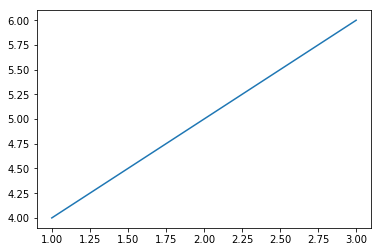

In [2]:
import numpy as np
import matplotlib.pyplot as plt
x = [1,2,3]
y = [4,5,6]
plt.plot(x,y)
plt.show()

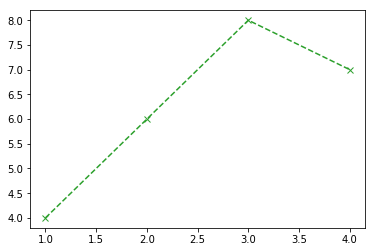

In [13]:
x = [1,2,3,4]
y = [4,6,8,7]
plt.plot(x,y,'x--', color = 'C2')
plt.show()

For a simple example lets plot sine. First I need to make a bunch of 'x' values that I want to evaluate sine at. There are two main ways of doing this

In [14]:
x = np.linspace(0,np.pi,10) #Goes from 0 to pi, and divides it into ten equal pieces. 
print(x)

[0.         0.34906585 0.6981317  1.04719755 1.3962634  1.74532925
 2.0943951  2.44346095 2.7925268  3.14159265]


In [15]:
x2 = np.arange(0,np.pi,0.1) #Goes from 0 to pi, in intervals of 0.1. Notice it doesn't get to pi
print(x2)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1]


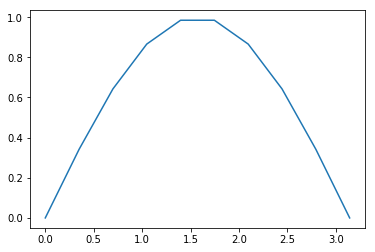

In [16]:
plt.plot(x, np.sin(x))
plt.show()

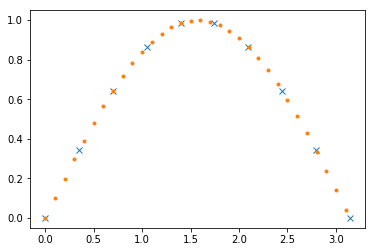

In [17]:
plt.plot(x, np.sin(x), 'x')
plt.plot(x2, np.sin(x2), '.')
plt.show()

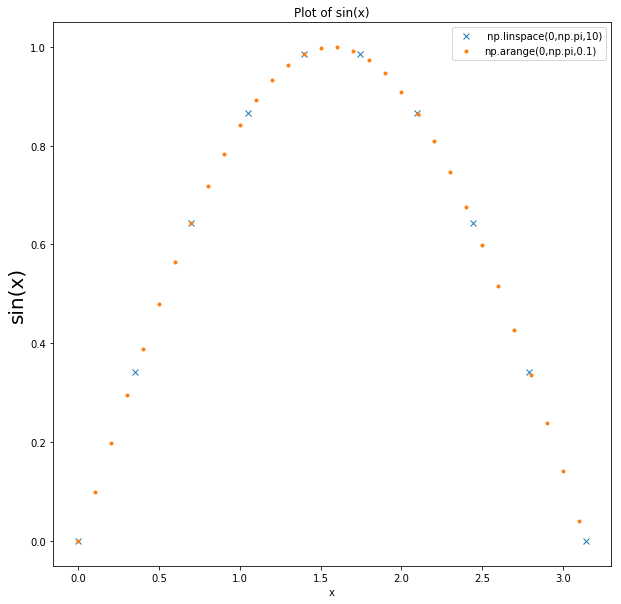

In [19]:
plt.figure(figsize = (10,10))
plt.plot(x, np.sin(x), 'x',label = ' np.linspace(0,np.pi,10)')
plt.plot(x2, np.sin(x2), '.', label = 'np.arange(0,np.pi,0.1)')
plt.title('Plot of sin(x)')
plt.ylabel('sin(x)',size = 20)
plt.xlabel('x')
plt.legend()
plt.show()

# Local vs. Global
Global variables are stored everywhere, and a program will use it even if not defined in the program.

In [20]:
x = 3
def foo(y):
    return x + y

In [21]:
foo(2)

5

The program 'foo' knew to use x = 3, even though it wasn't inside the function foo

In [22]:
x = 3
def foo2(y):
    x = 1
    return x + y

In [23]:
foo2(2)

3

But now, what's going to happen if I run original foo?

In [24]:
foo(2)

5

In [25]:
# %load /home/cody/Physics 331/Textbook Programs/Chapter 1/mars_angle.py
import numpy as np

def mars_angle(d):
    """
    Find the angle, in degrees, that mars appears in the sky on some day 'd' of
    the year 2000

    Input
    ----------
    d: This is the day that I want to evaluate things at

    Output
    ----------
    theta: Angle between Earth and Mars for the given input day 'd'
    """

    Pe = 365.256    #Period of the Earths orbit (days)
    Pm = 686.980    #Period of Mars orbit (days)
    d0 = 187        #Day in the year 2000 that mars crosses theta = 0
    Re = 1.496e8    #Radius of Earths Orbit (km)
    Rm = 2.279e8    #Radius of Mars orbit (km)

    phi_e = 2*np.pi*d/Pe
    phi_m = 2*np.pi*(d-d0)/Pm

    #Find the x and y positions for Earth and Mars
    xe = Re*np.cos( phi_e )
    ye = Re*np.sin( phi_e )
    xm = Rm*np.cos( phi_m )
    ym = Rm*np.sin( phi_m )

    if (xm-xe) > 0:
        theta = np.arctan((ym - ye) / (xm - xe))
    else:
        theta = np.arctan((ym - ye) / (xm - xe)) + np.pi
    theta = 180*theta / np.pi

    return theta


In [26]:
mars_angle(250)

46.14877288687658

In [27]:
print(Pe)

NameError: name 'Pe' is not defined

In [28]:
x = [ 1,2,3,4,5]
for n in x:
    print(n)

1
2
3


In [33]:
def bob(x):
    for n in x:
        return print(n)

In [34]:
bob(x)

1


In [36]:
def even_sum(x):
    answer = 0
    for n in x:
        if n%2 == 0:
            answer += n
            return answer

In [37]:
even_sum(x)

2

In [38]:
def f(x):
    return f(x+1)

In [ ]:
x = 0
while x < 10:
    x += 1
    print(x)